# Diabetes 데이터와 Linear Regression

- 당뇨병 진행도와 관련된 데이터를 이용.
- 당뇨병 진행을 예측하는 Linear Regression 학습.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2021)

## 1. Data

### 1.1 Data Load

- sklearn.datasets의 load_diabetes 함수 이용.

In [3]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

- 당뇨병 데이터에서 사용되는 변수명은 feature_names 키 값으로 들어 있음.
- 변수명과 변수에 대한 설명
    - age: 나이
    - sex: 성별
    - bmi: Body Mass Index
    - bp: Average Blood 
    - 혈청에 대한 6가지 지표들
        - S1, S2, S3, S4, S5, S6

In [4]:
diabetes['feature_names']

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

- 데이터와 정답을 확인하기.

In [5]:
data, target = diabetes['data'], diabetes['target']

In [6]:
data[0]

array([ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
       -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613])

In [7]:
target[0]

151.0

### 1.2 Data EDA

In [8]:
df = pd.DataFrame(data, columns=diabetes['feature_names'])

In [9]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.639623e-16,1.309912e-16,-8.013951e-16,1.289818e-16,-9.042540e-17,1.301121e-16,-4.563971e-16,3.863174e-16,-3.848103e-16,-3.398488e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


In [10]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


### Data Split
- sklearn.model_selection의 train_test_split 함수를 이용해 데이터를 나눔.

In [ ]:
train_test_split(
    *arrays,
    test_size = None,
    train_size = None,
    random_state = None,
    shuffle = True,
    stratify = None,
)

- *arrays: 입력은 array로 이루어진 데이터를 받습니다.
- test_size: test로 사용될 데이터의 사이즈를 정합니다.
- train_size: train으로 사용될 데이터의 사이즈를 정합니다.
- random_state: 다음에도 같은 값을 얻기 위해 난수를 고정.
- shuffle: 데이터를 섞을지 말지 결정.
- stratify: 데이터를 나눌 때 정답의 분포를 반영.

In [12]:
from sklearn.model_selection import train_test_split

# 나눌 dataset과 target을 parameter로 입력.
train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=0.3)

- train과 test를 7:3의 비율로 나눔.
- 실제로 확인해보기.

In [13]:
len(data), len(train_data), len(test_data)

(442, 309, 133)

In [16]:
print('train ratio : {:.2f}'.format(len(train_data)/len(data)))
print('test ratio : {:.2f}'.format(len(test_data)/len(data)))

train ratio : 0.70
test ratio : 0.30


## 2. Multivariate Regression

### 2.1 학습

In [17]:
from sklearn.linear_model import LinearRegression

multi_regressor = LinearRegression()
multi_regressor.fit(train_data, train_target)

LinearRegression()

### 2.2 회귀식 확인

In [18]:
multi_regressor.intercept_

147.71524417759434

In [19]:
multi_regressor.coef_

array([  15.28529701, -218.59128442,  545.19999487,  263.6592052 ,
       -582.66349612,  317.33684049,   48.53542723,  215.51374612,
        655.7965519 ,   64.04030953])

### 2.3 예측

In [20]:
multi_train_pred = multi_regressor.predict(train_data)
multi_test_pred = multi_regressor.predict(test_data)

### 2.4 평가

- 평가는 sklearn.metrics와 mean_squared_error를 이용.

In [23]:
from sklearn.metrics import mean_squared_error

multi_train_mse = mean_squared_error(multi_train_pred, train_target)
multi_test_mse = mean_squared_error(multi_test_pred, test_target)

In [24]:
print(f'Multi Regression Train MSE is {multi_train_mse:.4f}')
print(f'Multi Regression Test MSE is {multi_test_mse:.4f}')

Multi Regression Train MSE is 3034.2623
Multi Regression Test MSE is 2562.2750


## 3. Ridge Regression

### 3.1 학습

In [25]:
from sklearn.linear_model import Ridge

ridge_regressor = Ridge()
ridge_regressor.fit(train_data, train_target)

Ridge()

### 3.2 회귀식 확인

In [26]:
ridge_regressor.intercept_

147.74060119766182

In [28]:
# 비교
multi_regressor.coef_

array([  15.28529701, -218.59128442,  545.19999487,  263.6592052 ,
       -582.66349612,  317.33684049,   48.53542723,  215.51374612,
        655.7965519 ,   64.04030953])

- multi_regressor에는 545, 655와 같은 큰 값이 있음.

In [27]:
ridge_regressor.coef_

array([  46.89201977,  -55.64009506,  270.71747699,  158.68867814,
         23.59440223,  -11.13019705, -130.05870493,  122.00237806,
        225.92117758,  107.08728777])

### 3.3 예측

In [29]:
ridge_train_pred = ridge_regressor.predict(train_data)
ridge_test_pred = ridge_regressor.predict(test_data)

### 3.4 평가

In [31]:
ridge_train_mse = mean_squared_error(ridge_train_pred, train_target)
ridge_test_mse = mean_squared_error(ridge_test_pred, test_target)

In [32]:
print(f'Ridge Regression Train MSE is {ridge_train_mse:.4f}')
print(f'Ridge Regression Test MSE is {ridge_test_mse:.4f}')

Ridge Regression Train MSE is 3556.1983
Ridge Regression Test MSE is 3200.4051


## 4. LASSO Regression

### 4.1 학습

In [33]:
from sklearn.linear_model import Lasso

lasso_regressor = Lasso()
lasso_regressor.fit(train_data, train_target)

Lasso()

### 4.2 회귀식 확인

In [35]:
lasso_regressor.intercept_

148.13825690433762

In [36]:
lasso_regressor.coef_

array([  0.        ,   0.        , 377.69541767,   0.        ,
         0.        ,   0.        ,  -0.        ,   0.        ,
       316.05550058,   0.        ])

- 여러 변수들이 0이 되어있는 것을 확인.
- 이 때, 어떤 변수들이 선택되었는지 (0이 아닌지) 를 확인.

In [37]:
np.array(diabetes['feature_names'])[lasso_regressor.coef_ != 0]

array(['bmi', 's5'], dtype='<U3')

### 4.3 예측

In [38]:
lasso_train_pred = lasso_regressor.predict(train_data)
lasso_test_pred = lasso_regressor.predict(test_data)

### 4.4 평가

In [39]:
lasso_train_mse = mean_squared_error(lasso_train_pred, train_target)
lasso_test_mse = mean_squared_error(lasso_test_pred, test_target)

In [40]:
print(f'LASSO Regression Train MSE is {lasso_train_mse:.4f}')
print(f'LASSO Regression Test MSE is {lasso_test_mse:.4f}')

LASSO Regression Train MSE is 3897.9528
LASSO Regression Test MSE is 3581.6843


## 5. 마무리

### 5.1 평가

In [42]:
print(f'Multi Regression Test MSE is {multi_test_mse:.4f}')
print(f'Ridge Regression Test MSE is {ridge_test_mse:.4f}')
print(f'LASSO Regression Test MSE is {lasso_test_mse:.4f}')

Multi Regression Test MSE is 2562.2750
Ridge Regression Test MSE is 3200.4051
LASSO Regression Test MSE is 3581.6843


- Multi Regresison이 예측을 가장 잘했음.

### 5.2 예측값과 실제값의 관계 Plot

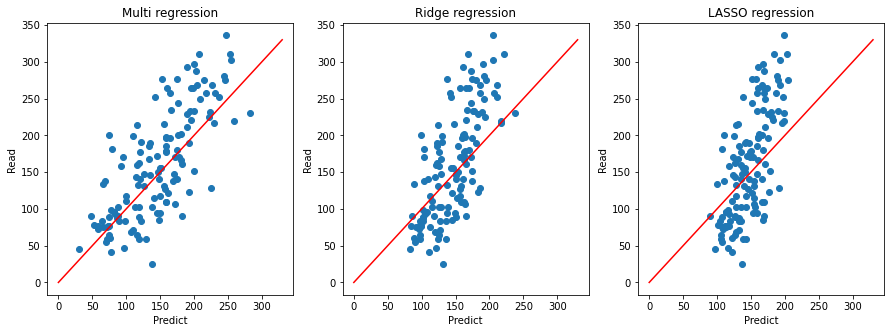

In [47]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
preds = [
    ('Multi regression', multi_test_pred),
    ('Ridge regression', ridge_test_pred),
    ('LASSO regression', lasso_test_pred),
]

for idx, (name, test_pred) in enumerate(preds):
    ax = axes[idx]
    ax.scatter(test_pred, test_target)
    ax.plot(np.linspace(0, 330, 100), np.linspace(0, 330, 100), color='red')
    ax.set_xlabel('Predict')
    ax.set_ylabel('Read')
    ax.set_title(name)

- 가로축: 예측값, 세로축: 실제값